In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = {
	"customerName":['varun', 'ajay', 'abhijeet','uma','nishit','nikunj','vijay', 'amar', 'chirag', 'abhinav'],
	"customerID":[1,2,3,4,5,6,7,8,9,10],
	"AvgsessionLength":[34.5, 31.9, 33.00,34.30,33.23,23.21,33.5, 30.9, 33.44,31.30],
	"AvgtimeOnWebsite":[39.57,37.26,37.11,36.72,37.53,33.46,39.68,34.26,33.11,32.72],
	"yearlyAmountSpent":[2000, 5000, 8000, 12000, 15000,4500,2600, 6000, 5000, 10000],
	"AvgtimeSpentToBuyAnItem":[33.56,42.13,25.64, 36.42,39.61, 23.54,33.56,42.13,25.64, 36.42],
}

In [3]:
data = pd.DataFrame(data)

In [7]:
data.head()

,customerName,customerID,AvgsessionLength,AvgtimeOnWebsite,yearlyAmountSpent,AvgtimeSpentToBuyAnItem
0,varun,1,34.50,39.57,2000,33.56
1,ajay,2,31.90,37.26,5000,42.13
2,abhijeet,3,33.00,37.11,8000,25.64
3,uma,4,34.30,36.72,12000,36.42
4,nishit,5,33.23,37.53,15000,39.61


In [8]:
df = data
df.head()

,customerName,customerID,AvgsessionLength,AvgtimeOnWebsite,yearlyAmountSpent,AvgtimeSpentToBuyAnItem
0,varun,1,34.50,39.57,2000,33.56
1,ajay,2,31.90,37.26,5000,42.13
2,abhijeet,3,33.00,37.11,8000,25.64
3,uma,4,34.30,36.72,12000,36.42
4,nishit,5,33.23,37.53,15000,39.61


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [9]:
data.columns

Index(['customerName', 'customerID', 'AvgsessionLength', 'AvgtimeOnWebsite',
       'yearlyAmountSpent', 'AvgtimeSpentToBuyAnItem'],
      dtype='object')

In [10]:
column_names = ['AvgsessionLength', 'AvgtimeOnWebsite',
       'yearlyAmountSpent', 'AvgtimeSpentToBuyAnItem']

In [11]:
features = df[column_names]

In [12]:
scaled = sc.fit_transform(features)

In [13]:
df[column_names] = scaled

In [14]:
df.head()

,customerName,customerID,AvgsessionLength,AvgtimeOnWebsite,yearlyAmountSpent,AvgtimeSpentToBuyAnItem
0,varun,1,0.824551,1.395361,-1.257980,-0.046797
1,ajay,2,-0.008976,0.455080,-0.504699,1.268130
2,abhijeet,3,0.343670,0.394023,0.248583,-1.261992
3,uma,4,0.760433,0.235274,1.252958,0.392023
4,nishit,5,0.417405,0.564983,2.006240,0.881477


In [15]:
X = df[['AvgsessionLength', 'AvgtimeOnWebsite',
       'yearlyAmountSpent']]
y = df['AvgtimeSpentToBuyAnItem']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_

array([0.15768168, 0.32972099, 0.2392907 ])

In [20]:
lr.intercept_

-0.0459071522943955

In [21]:
predictions = lr.predict(X_test)
predictions_train = lr.predict(X_train)
predictions = np.hstack((predictions_train, predictions))

In [22]:
predicted_df = pd.DataFrame(data=predictions, columns=['predictions'])

In [23]:
df_out = pd.merge(df, predicted_df, how ='left', left_index=True, 
                 right_index=True)

In [24]:
df_out

,customerName,customerID,AvgsessionLength,AvgtimeOnWebsite,yearlyAmountSpent,AvgtimeSpentToBuyAnItem,predictions
0,varun,1,0.824551,1.395361,-1.257980,-0.046797,-0.497176
1,ajay,2,-0.008976,0.455080,-0.504699,1.268130,0.451395
2,abhijeet,3,0.343670,0.394023,0.248583,-1.261992,-0.997378
3,uma,4,0.760433,0.235274,1.252958,0.392023,0.243166
4,nishit,5,0.417405,0.564983,2.006240,0.881477,0.686271
5,nikunj,6,-2.794880,-1.091703,-0.630246,-1.584203,-0.018043
6,vijay,7,0.503963,1.440136,-1.107324,-0.046797,0.197684
7,amar,8,-0.329564,-0.766064,-0.253605,1.268130,-0.411146
8,chirag,9,0.484728,-1.234170,-0.504699,-1.261992,0.243429
9,abhinav,10,-0.201329,-1.392918,0.750771,0.392023,-0.357275


In [29]:
column_names = ['AvgsessionLength', 'AvgtimeOnWebsite',
       'yearlyAmountSpent','predictions']
features = df_out[column_names]
inversescaled = sc.inverse_transform(features)
df_out[column_names] = inversescaled


df_out


,customerName,customerID,AvgsessionLength,AvgtimeOnWebsite,yearlyAmountSpent,AvgtimeSpentToBuyAnItem,predictions
0,varun,1,139.542985,133.354111,7.972159e+06,33.56,30.624671
1,ajay,2,131.432870,127.679105,1.991988e+07,42.13,36.806956
2,abhijeet,3,134.864072,127.310599,3.186761e+07,25.64,27.364618
3,uma,4,138.919130,126.352481,4.779790e+07,36.42,35.449828
4,nishit,5,135.581505,128.342418,5.974563e+07,39.61,38.337753
5,nikunj,6,104.326371,118.343598,1.792860e+07,23.54,33.747406
6,vijay,7,136.423710,133.624350,1.036170e+07,33.56,35.153402
7,amar,8,128.313595,120.308968,2.390246e+07,42.13,31.185367
8,chirag,9,136.236553,117.483749,1.991988e+07,25.64,35.451544
9,abhinav,10,129.561305,116.525631,3.983276e+07,36.42,31.536470


In [30]:
from sklearn import metrics

In [33]:
print('MAE ', metrics.mean_absolute_error(df_out['predictions'], df_out['AvgtimeSpentToBuyAnItem']))
print('MSE ', metrics.mean_squared_error(df_out['predictions'], df_out['AvgtimeSpentToBuyAnItem']))
print('RMSE', np.sqrt(metrics.mean_squared_error(df_out['predictions'], df_out['AvgtimeSpentToBuyAnItem'])))

MAE  4.9665925210943715
MSE  38.911543598243156
RMSE 6.237911797889031


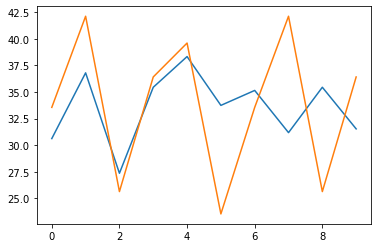

In [51]:

plt.plot(df_out['predictions'])
plt.plot(df_out['AvgtimeSpentToBuyAnItem'])
plt.title = "Avg Time spent to buy an item\nPredicted Time"
plt.xlabel = 'Predicted Time'
plt.ylabel = 'Avg actual Time'


plt.show()